In [71]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
path = "ex1data2.txt"
data = pd.read_csv(path,header=None,names=["Size","Bedrooms","Prize"])
data.head()
x_train = data.iloc[:,0:2]
y_train = data.iloc[:,2:3]
print(x_train)
print(y_train)

    Size  Bedrooms
0   2104         3
1   1600         3
2   2400         3
3   1416         2
4   3000         4
5   1985         4
6   1534         3
7   1427         3
8   1380         3
9   1494         3
10  1940         4
11  2000         3
12  1890         3
13  4478         5
14  1268         3
15  2300         4
16  1320         2
17  1236         3
18  2609         4
19  3031         4
20  1767         3
21  1888         2
22  1604         3
23  1962         4
24  3890         3
25  1100         3
26  1458         3
27  2526         3
28  2200         3
29  2637         3
30  1839         2
31  1000         1
32  2040         4
33  3137         3
34  1811         4
35  1437         3
36  1239         3
37  2132         4
38  4215         4
39  2162         4
40  1664         2
41  2238         3
42  2567         4
43  1200         3
44   852         2
45  1852         4
46  1203         3
     Prize
0   399900
1   329900
2   369000
3   232000
4   539900
5   299900
6   314900


In [73]:
scalar = StandardScaler()
x_norm = scalar.fit_transform(x_train)
print(x_norm)
y_train = np.ravel(y_train)
print(y_train)

[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.26093368e-01]
 [ 6.68172729e-01 -2.26093368e-01]
 [ 2.53521350e-01 -2

In [74]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_norm,y_train)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

number of iterations completed: 166, number of weight updates: 7803.0


In [75]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
pre = sgdr.predict(x_norm)
print(pre)

model parameters:                   w: [108970.02219845  -6110.52596198], b:[340380.62328942]
[356082.51413669 286226.61455215 397108.99484507 268840.26976522
 472154.17738432 331472.15738767 277078.81817798 262248.2998138
 255733.95997159 271534.69916333 325235.02349619 341667.80469861
 326421.47740833 668892.77229505 240210.42673058 375132.09462801
 255534.38413006 235775.13151887 417960.41401615 476450.86962067
 309373.31143829 334260.87413804 286781.02645361 328284.28895425
 603627.42814063 216925.12686907 266544.99205015 414572.9697412
 369388.39977184 429957.90000684 327469.3283451  219298.03469334
 339095.32103281 499259.38768992 307355.23967396 263634.32956746
 236190.94044496 351846.7947665  640556.79245419 356004.88402748
 303213.80765602 374655.31283575 412139.08905077 230785.42440568
 190668.19165871 313037.96166397 231201.23333178]


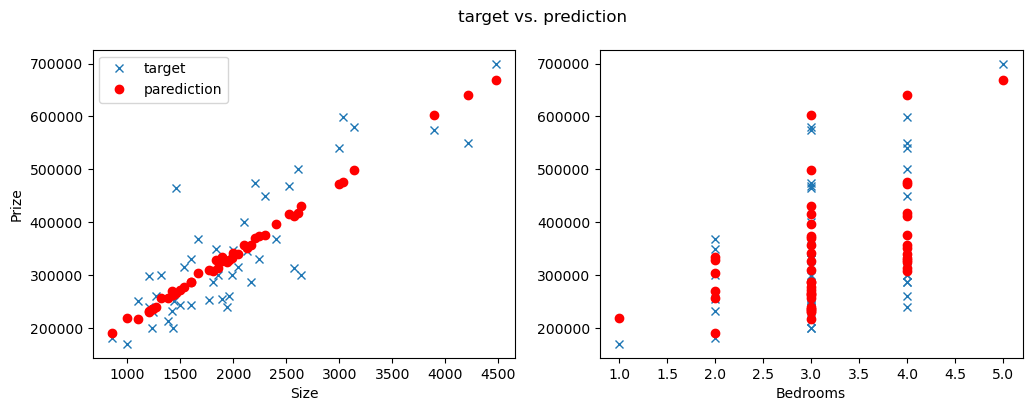

In [76]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
for i in range(x_train.shape[1]):
    ax[i].plot(x_train.iloc[:,i],y_train,'x',label="target")
    ax[i].plot(x_train.iloc[:,i],pre,'o',label="parediction",color="r")
    ax[i].set_xlabel(data.columns[i])
ax[0].legend(loc='best')
ax[0].set_ylabel(data.columns[-1])
fig.suptitle("target vs. prediction")
plt.show()
